In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
#matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.transform import resize
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [2]:
labels=pd.read_csv('./dataset/label_binary.csv',index_col=0)
#print(df.head())

def get_image(filename, root="dataset/image/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

In [12]:
def create_features(image, size=None):
    
    if type(size) == tuple:
        image = resize(image,size)

    # turn greyscale image saved as RGB into greyscale
    grey_image = rgb2gray(image)
    
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(8, 8))
    
    return hog_features

In [ ]:
from tqdm import tqdm

def create_feature_matrix(label_dataframe):
    features_list = []
    
    for image_id in tqdm(label_dataframe.index):
        # load image
        image = get_image(image_id)
        # get features for image
        image_features = create_features(image,(256,256))
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)
print('Feature matrix shape is: ', feature_matrix.shape)

 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 1938/3000 [01:44<00:59, 17.91it/s]

In [5]:
# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
tumor_stand = ss.fit_transform(feature_matrix)

pca = PCA(n_components=3000)
# use fit_transform to run PCA on our standardized matrix
tumor_pca = pca.fit_transform(tumor_stand)
# look at new shape
print('PCA matrix shape is: ', tumor_pca.shape)

PCA matrix shape is:  (3000, 324)


In [6]:
X = pd.DataFrame(tumor_pca)
y = pd.Series(labels.label.values)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=1234123)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

1    2037
0     363
dtype: int64

In [7]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [8]:
define support vector classifier
svm2 = SVC(kernel='sigmoid', probability=True, random_state=42)

fit model
svm2.fit(X_train, y_train)

In [9]:
# generate predictions
y_pred = svm.predict(X_test)
y_pred2 = svm2.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
#accuracy = [accuracy_score(y_test, y_pred),accuracy_score(y_test, y_pred2)]
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.96


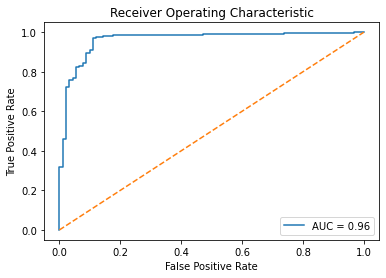

In [10]:
# predict probabilities for X_test using predict_proba
#probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
#y_prob = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob, pos_label=1)

# calculate AUC
#roc_auc = auc(false_positive_rate, true_positive_rate)

#plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
#roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

#plt.legend(loc=0)
#plt.plot([0,1], [0,1], ls='--')
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate');